In [20]:
# Analysis of DataSet : Hospitalized patients with heart failure

#pip install missingno # To be installed if its not installed already

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
%matplotlib inline


In [21]:
df_HD = pd.read_excel(r'C:\Users\Megala Selvan\Downloads\Cardiac_Outcomes.xlsx', sheet_name ='Hospitalization_Discharge')
df_HD

,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,death_within_28_days,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,11,2017-01-24,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,8,2017-05-05,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,NaN,OxygenTherapy,5,2016-11-18,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
3,775928,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,11,2017-10-02,...,0,1,0,1,0,1,NaN,19.0,1.0,19.0
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,5,2019-11-17,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,5,2016-02-07,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2004,734280,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,8,2017-03-29,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2005,781004,HealthcareFacility,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,14,2018-01-22,...,0,0,0,1,0,1,NaN,76.0,1.0,76.0
2006,744870,Unknown,Cardiology,NonEmergency,Cardiology,1,IMV,OxygenTherapy,1,2019-11-27,...,1,0,1,0,1,0,1.0,NaN,0.0,NaN


In [22]:
df_CC = pd.read_excel(r'C:\Users\Megala Selvan\Downloads\Cardiac_Outcomes.xlsx', sheet_name = 'CardiacComplications')
df_CC


,inpatient_number,NYHA_cardiac_function_classification,Killip_grade,myocardial_infarction,congestive_heart_failure,peripheral_vascular_disease,type_of_heart_failure,LVEF,left_ventricular_end_diastolic_diameter_LV,mitral_valve_EMS,mitral_valve_AMS,EA,tricuspid_valve_return_velocity,tricuspid_valve_return_pressure
0,857781,3,3,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,743087,3,1,0,0,0,Both,NaN,40.0,1.16,1.52,NaN,3.34,47.0
2,866418,2,2,0,0,0,Both,NaN,46.0,0.84,0.12,7.00,2.80,32.0
3,775928,3,2,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,3,2,0,0,0,Both,NaN,64.0,1.20,0.90,1.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,4,1,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,734280,4,2,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,2.78,NaN
2005,781004,3,1,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,744870,4,4,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_respo = pd.read_excel(r'C:\Users\Megala Selvan\Downloads\Cardiac_Outcomes.xlsx', sheet_name = 'Responsivenes')
df_respo


,inpatient_number,eye_opening,verbal_response,movement,consciousness,GCS
0,857781,4,5,6,Clear,15
1,743087,4,5,6,Clear,15
2,866418,4,5,6,Clear,15
3,775928,4,5,6,Clear,15
4,810128,4,5,6,Clear,15
...,...,...,...,...,...,...
2003,740689,4,5,6,Clear,15
2004,734280,4,5,6,Clear,15
2005,781004,4,5,6,Clear,15
2006,744870,1,1,1,Nonresponsive,3


In [24]:
df_PH = pd.read_excel(r'C:\Users\Megala Selvan\Downloads\Cardiac_Outcomes.xlsx', sheet_name = 'PatientHistory')
df_PH


,inpatient_number,cerebrovascular_disease,dementia,Chronic_obstructive_pulmonary_disease,connective_tissue_disease,peptic_ulcer_disease,diabetes,moderate_to_severe_chronic_kidney_disease,hemiplegia,leukemia,malignant_lymphoma,solid_tumor,liver_disease,AIDS,CCI_score,type_II_respiratory_failure,acute_renal_failure
0,857781,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,0
1,743087,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,0
2,866418,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,0
3,775928,0,0,1,0,0.0,0,1.0,0,0,0,0,0.0,0,2.0,NonTypeII,0
4,810128,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,0,0,0,0,0.0,0,1.0,0,0,0,0,0.0,0,2.0,NonTypeII,0
2004,734280,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,1.0,NonTypeII,0
2005,781004,0,0,0,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,0
2006,744870,0,0,0,0,0.0,0,1.0,0,0,0,0,0.0,0,2.0,NonTypeII,0


In [25]:
df_labs = pd.read_excel(r'C:\Users\Megala Selvan\Downloads\Cardiac_Outcomes.xlsx', sheet_name = 'Labs')
df_labs


,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
0,857781,36.7,87,19,102,64,76.666667,33,108.3,12.55,...,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0
1,743087,36.8,95,18,150,70,96.666667,33,62.0,4.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,866418,36.5,98,18,102,67,78.666667,33,185.1,15.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,775928,36.0,73,19,110,74,86.000000,33,104.8,8.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,35.0,88,19,134,62,86.000000,33,83.9,6.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,36.1,117,22,120,80,93.333333,33,115.3,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,734280,36.3,70,21,120,86,97.333333,29,63.1,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,781004,36.8,113,19,135,100,111.666667,33,51.9,4.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,744870,36.4,134,19,92,72,78.666667,41,191.1,35.87,...,-2.5,18.8,0.3,37.0,96.0,84.0,95.6,21.8,0.94,139.0


In [26]:
df_demography = pd.read_excel(r'C:\Users\Megala Selvan\Downloads\Cardiac_Outcomes.xlsx', sheet_name = 'Demography')
df_demography



,inpatient_number,gender,weight,height,BMI,occupation,ageCat
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79
2,866418,Male,70.0,1.70,24.221453,farmer,59-69
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79
...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59


In [27]:
df_Presc = pd.read_excel(r'C:\Users\Megala Selvan\Downloads\Cardiac_Outcomes.xlsx', sheet_name = 'Patient_Precriptions')

df_Presc

,inpatient_number,Drug_name
0,857781,sulfotanshinone sodium injection
1,857781,Furosemide tablet
2,857781,Enoxaparin Sodium injection
3,857781,Meglumine Adenosine Cyclophosphate for injection
4,857781,Furosemide injection
...,...,...
15365,123456,Furosemide injection
15366,678910,Deslanoside injection
15367,678910,Milrinone injection
15368,678910,Furosemide injection


In [36]:
#1. How many patients were registered in each unique occupation?

df_demography.groupby(['occupation'])['inpatient_number'].nunique()

#Additional
#df_demography['occupation'].unique()
#for column in df_demography:unique_values=df_demography['occupation'].unique()
          

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
Name: inpatient_number, dtype: int64

In [29]:
# Additional Code
#df_demography.groupby(["occupation"])["inpatient_number"].count()

In [37]:
#9. Create any 2 2-D arrays and perform matrix multiplication.Display the resulting array

#creating first array

arr1=np.array([[1,2,],[3,4]])
print(arr1)
print(arr1.ndim)

#creating second array

arr2=np.array([[5,6],[7,8]])
print(arr2)
print(arr2.ndim)

#Matrix Multiplying two arrays
print("Output:")
arr1=np.array([[1,2,],[3,4]])
arr2=np.array([[5,6],[7,8]])
arr=np.dot(arr1,arr2)
print(arr)

[[1 2]
 [3 4]]
2
[[5 6]
 [7 8]]
2
Output:
[[19 22]
 [43 50]]


<Axes: >

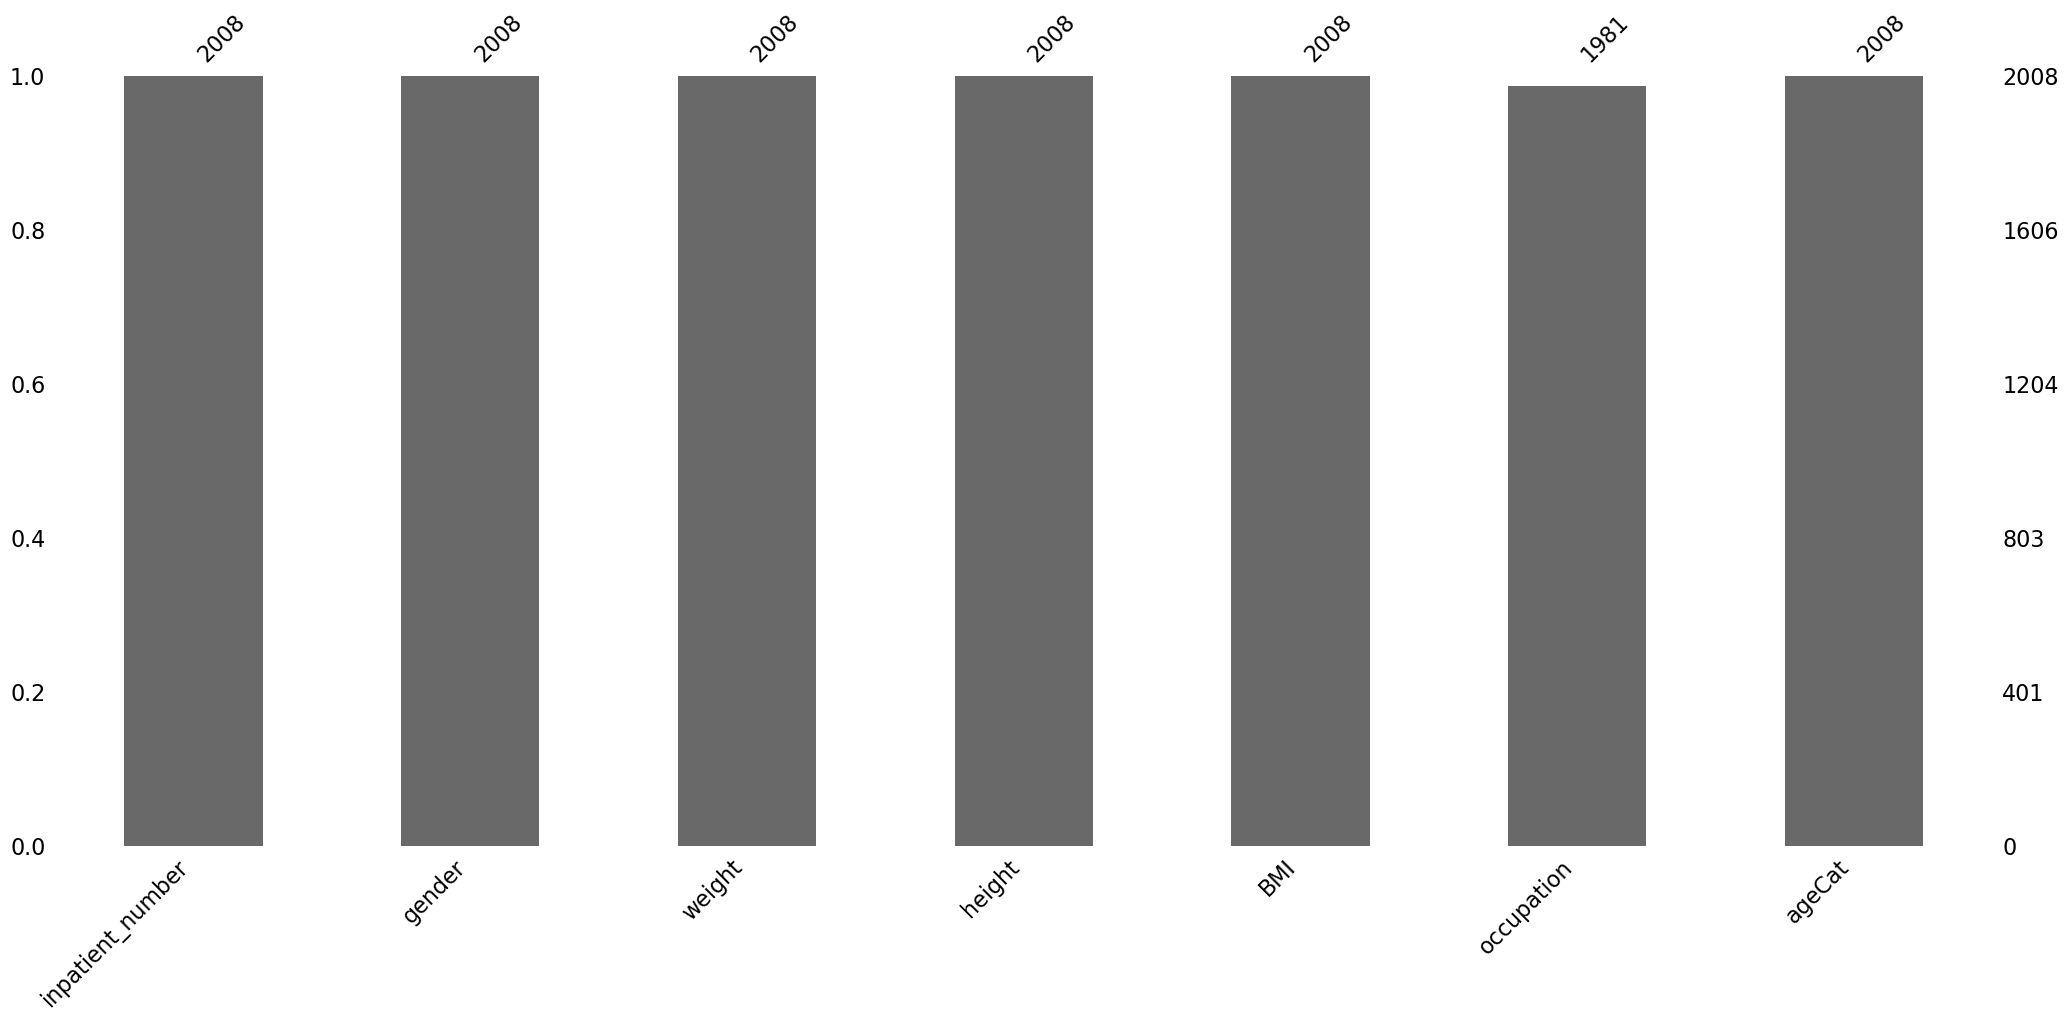

In [34]:
#7. Visualize missing data and missing patterns from demography table using the "Missing No" Library

msno.bar(df_demography)